In [34]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import InputLayer, Flatten
from keras.layers.core import Dense
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
import shutil

In [13]:
DATA_PATH = './ShenZhen'
TRAIN_PATH = f'{DATA_PATH}/train'
VALID_PATH = f'{DATA_PATH}/valid'
TEST_PATH = f'{DATA_PATH}/test'
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = (IMAGE_SIZE[0], IMAGE_SIZE[1], 1)
MAX_ACC = 0.97
BASE_LEARNING_RATE = 0.0001
VALID_RATIO = 0.1

# LOAD DATASET

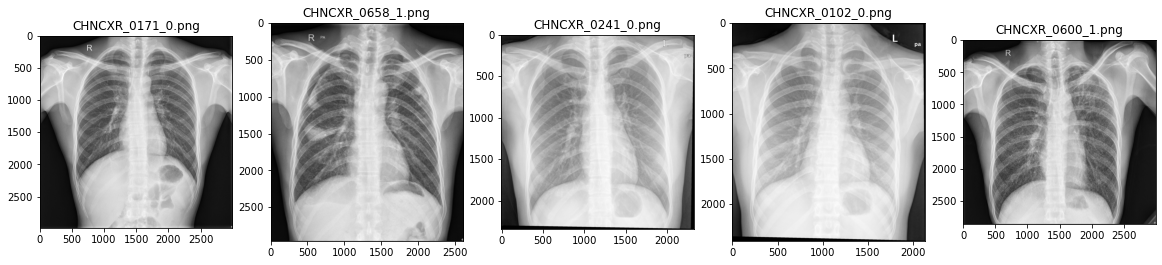

In [3]:
plt.figure(figsize=(20,20))
test_folder=r'D:\FourthYear\GraduateThesis\Abnormal-detection-on-chest-x-ray\ShenZhen\images'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [9]:
data = pd.read_csv(f'{DATA_PATH}/shenzhen_metadata.csv')
del data["sex"]
del data["age"]
data['normal'] = 0
data['abnormal'] = 0
data = data.rename(columns = {'findings':'status'})
for i in data.index:
    if data['status'][i] == 'normal':
        data['normal'][i] = 1
    else:
        data['abnormal'][i] = 1
del data["status"]
patient_status = list(data)[1:]
data

<ipython-input-9-8e15cdcc3112>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normal'][i] = 1
<ipython-input-9-8e15cdcc3112>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abnormal'][i] = 1


,study_id,normal,abnormal
0,CHNCXR_0001_0.png,1,0
1,CHNCXR_0002_0.png,1,0
2,CHNCXR_0003_0.png,1,0
3,CHNCXR_0004_0.png,1,0
4,CHNCXR_0005_0.png,1,0
...,...,...,...
657,CHNCXR_0658_1.png,0,1
658,CHNCXR_0659_1.png,0,1
659,CHNCXR_0660_1.png,0,1
660,CHNCXR_0661_1.png,0,1


# Visualize dataset

Text(1, 336, '336')

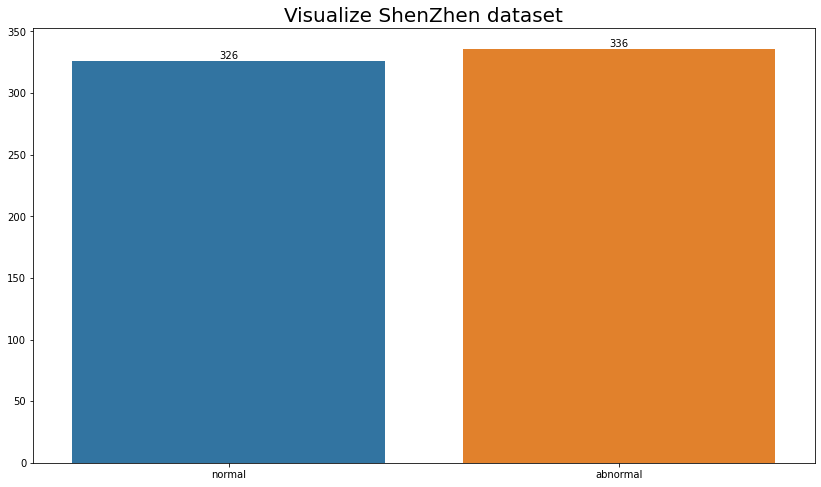

In [10]:
counter = []
fig, ax = plt.subplots(figsize =(14, 8))
#plt.figure(figsize=(15,8))
plt.title("Visualize ShenZhen dataset", fontsize=20)
for i in patient_status:
    counter.append(data[data[i]==1].count().study_id)

sns.barplot(x = patient_status, y = counter)
plt.text(0,counter[0],counter[0],ha="center",va="bottom")
plt.text(1,counter[1],counter[1],ha="center",va="bottom")


# Split training data

In [45]:
if os.path.isdir(TRAIN_PATH) is False:
    # Create train, valid, test folders
    os.mkdir(TRAIN_PATH)
    os.mkdir(VALID_PATH)
    os.mkdir(TEST_PATH)

    #get all images
    images_id = data.study_id.values

    train, test = train_test_split(images_id, test_size = 0.2)

    # Copy test images to test folder
    for img_id in test:
      shutil.copy(f'{DATA_PATH}/images/{img_id}', TEST_PATH)

    #Create (normal, abnormal) folder
    for i in patient_status:
      os.mkdir(f'{TRAIN_PATH}/{i}')
      os.mkdir(f'{VALID_PATH}/{i}')
      os.mkdir(f'{TEST_PATH}/{i}')
    
      #split train, valid
      train_id, valid_id = train_test_split(train, test_size = VALID_RATIO)

      #Copy train images to train folder
      for img_id in train_id:
        shutil.copy(f'{DATA_PATH}/images/{img_id}', f'{TRAIN_PATH}/{i}')

      # Copy validation images to validation folder
        for img_id in valid_id:
            shutil.copy(f'{DATA_PATH}/images/{img_id}', f'{VALID_PATH}/{i}')
    

# Create data batches

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

